In [1]:
# import libraries
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import display, Math
from sympy.physics.mechanics import init_vprinting, vlatex

In [2]:
#sym.init_printing()

## Kinematics using Lagrangian Approach
Generalized coordinates are: $[\theta(t),\; s(t)]$.
Here our approach will be to use contrain(fixed coupler length) to solve the problem.

In [3]:
# define variables for the problem
# k_r = radius of gyration of link 2
t,lag,k,m2,kr,kr3,m3,m4,l2,a,l3,ev,f1,cd,cd2,p,A,theta,If = sym.symbols('t,\mathcal{L},k,m_2,k_r,k_{r3},m_3,m_4,l2,a,l3,e_v,f_1,c_d,c_{d2},p,A,theta,I_{f}')
ma = m3*(l3-a)/l3; 
mb = m3*a/l3; # ma and mb are apportioned coupler mass

display(Math('m_a = '+ sym.latex(ma)))
display(Math('m_b = '+ sym.latex(mb)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

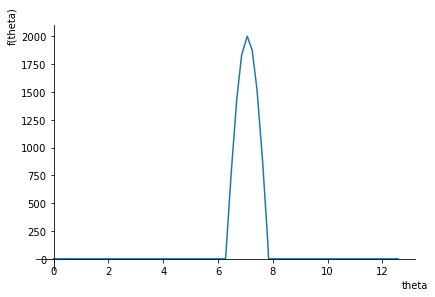

In [4]:
pres = sym.Piecewise( 
    (2e3*sym.sin(2*theta), (2*sym.pi<=theta)&(theta<=2*sym.pi+1.55)),
    (0, True))

display(Math('p = '+ sym.latex(pres)))
fig = sym.plotting.plot(pres,(theta,0,4*sym.pi))

In [5]:
# theta and s_d are fuctions of time
theta = sym.Function('theta')(t)
sd = sym.Function('s_d')(t)
co = sym.Function('c_o')(theta,sd) # constraint function

In [6]:
v1 = sym.diff(theta,t)
v2 = sym.diff(sd,t)

zf = (l2*sym.cos(theta)-sd)**2+(l2*sym.sin(theta)-ev)**2

display(Math('v_1 = '+ sym.latex(v1)))
display(Math('v_2 = '+ sym.latex(v2)))
display(Math('z_f = '+ vlatex(zf)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# define some useful array to be used later
a1 = sym.Array([theta,sd])
b1 = sym.Array([sym.diff(a1[0],t), sym.diff(a1[1],t)])
c1 = sym.Array([sym.diff(b1[0],t), sym.diff(b1[1],t)])
d1 = sym.Array([sym.diff(co,a1[0]), sym.diff(co,a1[1])])
e1 = sym.Array([sym.diff(zf,a1[0]), sym.diff(zf,a1[1])])
tau = -cd2*b1[0]

display(Math('a_1 = '+ vlatex(a1)))
display(Math('b_1 = '+ vlatex(b1)))
display(Math('c_1 = '+ vlatex(c1)))
display(Math('d_1 = '+ vlatex(d1)))
display(Math('e_1 = '+ vlatex(e1)))
display(Math('\\tau = '+ vlatex(tau)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<font size="3">Define Lagrangian as</font>
\begin{align*}
\mathcal{L} &= T - V\\
T &= \frac{1}{2}m_2k_r^2\dot\theta^2+\frac{1}{2}m_al_2^2\dot\theta^2+\frac{1}{2}(m_4+m_b)\dot s_d^2,\ kinetic\ energy\ of\ the\ system\\
V &= \frac{1}{2}kC^2,\ potential\ energy\ of\ the\ system
\end{align*}

In [8]:
# Define Lagrangian
kinetic = (1/2)*(m2*kr**2+If)*v1**2+(1/2)*ma*l2**2*v1**2+(1/2)*(m4+mb)*v2**2 # kinetic energy of the system
potential = (1/2)*k*co**2 ## potential energy of the system
lag = kinetic - potential
display(Math('T = '+ vlatex(kinetic)))
display(Math('V = '+ vlatex(potential)))
display(Math('\mathcal{L} = '+ vlatex(lag)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
def udef(f,a):
    return sym.diff(f,a)

# Function for taking derivative of a scaler function w.r.t elements of a vector
def mdel(f,a):
    """
    Arguments:
    f : a scaler
    a : a vector w.r.t whose element f is derivated
    """
    return [udef(f,a_i) for a_i in a]

In [10]:
# Equation of Motion for the system
eqn = sym.diff(sym.Array(mdel(lag,b1)),t) - sym.Array(mdel(lag,a1)) - sym.Array([f1,-cd*b1[1]-p*A])
eqn1 = sym.Eq(eqn[0],0)
eqn2 = sym.Eq(eqn[1],0)
print('The equations of motion are:')
display(Math('\\theta: '+ vlatex(eqn1)))
display(Math('s_d: '+ vlatex(eqn2)))

The equations of motion are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
eqarr = sym.Array([sym.Eq(eq,0) for eq in eqn])
display(Math(vlatex(eqarr)))

<IPython.core.display.Math object>

## Numerical Solution:

<font size='3'>First find $\ddot \theta(t)$ and $\ddot s_d(t)$ by solving the above system of linear equations

In [12]:
d2w = sym.Array(sym.linsolve(eqarr,c1))[0]
display(Math('d2w: '+ vlatex(d2w)))

<IPython.core.display.Math object>

<font size='3'>Solution contain $\frac{dC}{d\theta}$ and $\frac{dC}{ds}$. But we know,</font>
\begin{align*}
\frac{dC}{d\theta} &= \frac{1}{2l_3}\frac{dz_f}{d\theta}\\
\frac{dC}{ds} &= \frac{1}{2l_3}\frac{dz_f}{ds}
\end{align*}
<font size='3'>Substitute these values.</font>

In [13]:
d2w1 = d2w.subs([(d1[0],e1[0]/(2*l3)),(d1[1],e1[1]/(2*l3))])
display(Math('d2w1: '+ vlatex(d2w1)))

<IPython.core.display.Math object>

<font size="3">Determination of values of $kC$, the constrain force</font>
\begin{align*}
C(\theta,s) &= \sqrt z-l_3\\
\dot C(\theta,s) &= \frac{1}{2\sqrt z }(\frac{\partial z}{\partial\theta}\dot\theta+\frac{\partial z}{\partial s}\dot s)\\
\ddot C(\theta,s) &= \frac{\partial z}{\partial\theta}\dot\theta+\frac{\partial z}{\partial s}\dot s+\frac{\partial^2 z}{\partial\theta^2}\dot\theta^2+2\frac{\partial^2 z}{\partial\theta \partial s}\dot\theta\dot s+\frac{\partial^2 z}{\partial s^2}\dot s^2
\end{align*}

In [14]:
# ceq is the double time-derivative of the constrain
ceq = sym.diff(zf,theta)*c1[0]+sym.diff(zf,sd)*c1[1]+sym.diff(zf,[theta,2])*b1[0]**2+2*sym.diff(sym.diff(zf,theta),sd)*b1[0]*b1[1]+sym.diff(zf,[sd,2])*b1[1]**2
display(Math('\ddot C = '+ vlatex(ceq)))

<IPython.core.display.Math object>

In [15]:
# substitue \ddot\theta and \ddot s in ceq
ceq1 = ceq.subs([(c1[0],d2w1[0]),(c1[1],d2w1[1])])
display(Math('ceq1 = '+ vlatex(ceq1)))

<IPython.core.display.Math object>

In [16]:
# solve for k in kC
kv = sym.solve(ceq1,k)[0]
display(Math('k = '+ vlatex(kv)))

<IPython.core.display.Math object>

In [17]:
# substitute kv in d2w1 array
d2w2 = d2w1.subs(k,kv)
display(Math('d2w2 = '+ vlatex(d2w2)))

<IPython.core.display.Math object>

<font size='3'>Now we have $\ddot\theta(t)$ and $\ddot s(t)$ in terms of $\theta,\dot\theta,s,\dot s$ only, after eliminating the constrain.To solve the second order differential equations, we define the array of state variables as</font>
\begin{align*}
zarr&=
\begin{bmatrix}
z_1(t) & z_2(t) & z_3(t) & z_4(t)
\end{bmatrix}^{T}
\end{align*}
<font size='3'>where $z_1=\theta,\; z_2=s,\; z_3=\dot\theta,\; z_4=\dot s$</font>

In [18]:
# Now we define z matrix to convert the second order odes to first order odes
zarr = sym.Array([sym.Function('z1')(t),sym.Function('z2')(t),sym.Function('z3')(t),sym.Function('z4')(t)])
d1zarr = sym.diff(zarr,t)
display(Math('zarr = '+ sym.latex(zarr)))
display(Math('d1zarr = '+ vlatex(d1zarr)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# substitue z values in the solved accelarations

# first replace velocities and then coordinates
nd2w = d2w2.subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])]) 

display(Math('nd2w = '+ vlatex(nd2w)))

<IPython.core.display.Math object>

<font size='3'>Next we define the rhs of the system of differential equation as:</font>
\begin{align*}
rhs &=
\begin{bmatrix}
z_3(t) & z_4(t) & \ddot\theta(t) & \ddot s(t)
\end{bmatrix}^{T}
\end{align*}

In [20]:
rhs = sym.Array([zarr[2],zarr[3],nd2w[0],nd2w[1]])
display(Math('rhs = '+ vlatex(rhs)))

<IPython.core.display.Math object>

In [86]:
# Define array to replace variables for solving the eqn.
varr = [(m2,1.4),(m3,1.6),(m4,1),(l2,0.04),(l3,0.14),(a,0.07),(kr,0.023),(kr3,0.04),(f1,0.2),(cd,5),(ev,0),(A,0.05),(If,0)]
varr

[(m_2, 1.4),
 (m_3, 1.6),
 (m_4, 1),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (I_{f}, 0)]

In [22]:
rhs.subs(varr).subs(p,0)

[z3(t), z4(t), -1767.50894359525*(-0.08*(-z2(t) + 0.04*cos(z1(t)))*sin(z1(t)) + 0.0032*sin(z1(t))*cos(z1(t)))*(2.85147072e-6*z2(t)*z3(t)**2*cos(z1(t)) - 0.0001980188*z2(t)*z4(t) + 0.00028224*z2(t)*sin(z1(t)) + 5.70294144e-6*z3(t)*z4(t)*sin(z1(t)) + 7.1286768e-5*z4(t)**2 + 7.920752e-6*z4(t)*cos(z1(t)))/(0.0004032*z2(t)**2*sin(z1(t))**2 + 0.000282884*z2(t)**2 - 2.263072e-5*z2(t)*cos(z1(t)) + 4.526144e-7*cos(z1(t))**2) + 98.9805008413343, -1.98412698412698*(2*z2(t) - 0.08*cos(z1(t)))*(2.85147072e-6*z2(t)*z3(t)**2*cos(z1(t)) - 0.0001980188*z2(t)*z4(t) + 0.00028224*z2(t)*sin(z1(t)) + 5.70294144e-6*z3(t)*z4(t)*sin(z1(t)) + 7.1286768e-5*z4(t)**2 + 7.920752e-6*z4(t)*cos(z1(t)))/(0.0004032*z2(t)**2*sin(z1(t))**2 + 0.000282884*z2(t)**2 - 2.263072e-5*z2(t)*cos(z1(t)) + 4.526144e-7*cos(z1(t))**2) - 2.77777777777778*z4(t)]

In [23]:
def dydt(zz,tval):
    if (zz[0]%(4*np.pi) >= (2*np.pi)) and (zz[0]%(4*np.pi) <= (2*np.pi)+1.55):
        temp = rhs.subs(varr).subs(p,2e3*sym.sin(2*(zz[0]%(4*np.pi)))) # substitue pressure values at correct interval
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])
    else:
        temp = rhs.subs(varr).subs(p,0)
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])

<font size='3'>Define the time steps over which to solve the equations and and define the initian conditions, i.e.</font>
\begin{align*}
y_{init} &= [z_1(0),z_2(0),z_3(0),z_4(0)]\\
&= [\theta(0),s(0),\dot\theta(0),\dot s(0)]
\end{align*}

In [24]:
n_steps = 400
tout = np.linspace(0,2,n_steps)
#yinit = [np.pi/2,(sym.sqrt(l3**2-(l2-ev)**2)).subs(varr),0,0]
yinit = [1e-5,(l2+l3).subs(varr),0,0]
yinit

[1e-05, 0.180000000000000, 0, 0]

In [25]:
sol = odeint(dydt,yinit,tout)
for i in range(n_steps):
    sol[i,0] = sol[i,0]%(4*np.pi)
sol

array([[ 1.00000000e-05,  1.80000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 1.25346484e-03,  1.79999959e-01,  4.96141730e-01,
        -3.19733974e-05],
       [ 4.98380424e-03,  1.79999361e-01,  9.92250564e-01,
        -2.54312108e-04],
       ...,
       [ 1.19649233e+01,  1.71138972e-01,  1.04813851e+02,
         2.93860730e+00],
       [ 1.40465430e-02,  1.79994858e-01,  1.36728788e+02,
        -9.87670433e-02],
       [ 6.23790522e-01,  1.70503303e-01,  1.03658516e+02,
        -2.99159632e+00]])

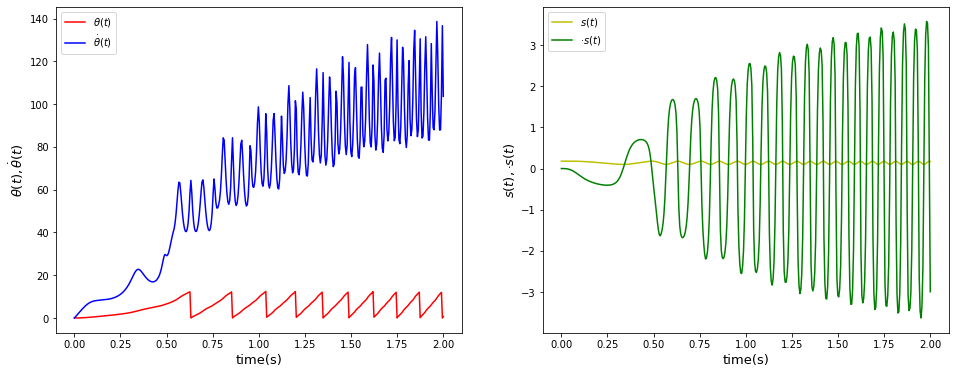

In [26]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(tout,sol[:,0],'r', label=r'$\theta(t)$')
plt.plot(tout,sol[:,2],'b', label=r'$\dot\theta(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$\theta(t), \dot\theta(t)$', fontsize=13)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(tout,sol[:,1],'y', label=r'$s(t)$')
plt.plot(tout,sol[:,3],'g', label=r'$\dot s(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$s(t), \dot s(t)$', fontsize=13)
plt.legend(loc='best')
plt.show()

## Check For Constrain Satisfaction:

In [27]:
# substitute z values in place of physical coordinate in z_f
zfa = (zf.subs(varr)).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
zfa

(-z2(t) + 0.04*cos(z1(t)))**2 + 0.0016*sin(z1(t))**2

In [28]:
# calculate pressure values for different crank angle i.e. at every time step
parr = []
for i in range(n_steps):
    if sol[i,0]>=2*sym.pi and sol[i,0]<=2*sym.pi+1.64:
        parr.append(5e3*sym.sin(2*sol[i,0]))
    else:
        parr.append(0)
        
parr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 418.469546113690,
 1857.56959771485,
 3119.19333858138,
 4116.01161716234,
 4773.42315735296,
 4999.48622057473,
 4696.63750484662,
 3801.52304185034,
 2336.11878802768,
 449.690280679877,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2740.37799503887,
 4569.18624538980,
 4970.56336197620,
 4060.87568712246,
 2064.90917956168,
 -574.399309681217,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [29]:
# create a substitution array, get values of z1,z2,z3,z4 at different time instants
subarr = [[(zarr[j],sol[i,j]) for j in range(4)] for i in range(n_steps)]
subarr

[[(z1(t), 1e-05), (z2(t), 0.18000000000000002), (z3(t), 0.0), (z4(t), 0.0)],
 [(z1(t), 0.0012534648422642457),
  (z2(t), 0.17999995930955642),
  (z3(t), 0.4961417296302937),
  (z4(t), -3.1973397436424205e-05)],
 [(z1(t), 0.004983804244011873),
  (z2(t), 0.1799993611174463),
  (z3(t), 0.9922505635190255),
  (z4(t), -0.00025431210833971976)],
 [(z1(t), 0.011200522345592405),
  (z2(t), 0.1799967740208997),
  (z3(t), 1.4881614922215258),
  (z4(t), -0.0008571816546978723)],
 [(z1(t), 0.01990168808023961),
  (z2(t), 0.1799898156272745),
  (z3(t), 1.9834438880768257),
  (z4(t), -0.002029858148257513)],
 [(z1(t), 0.031082263926674843),
  (z2(t), 0.17997516046882692),
  (z3(t), 2.4772679678009966),
  (z4(t), -0.003958913235381114)],
 [(z1(t), 0.044731789920285404),
  (z2(t), 0.1799485613696193),
  (z3(t), 2.968279650465731),
  (z4(t), -0.0068248178887497166)],
 [(z1(t), 0.060831477090256734),
  (z2(t), 0.17990489262981527),
  (z3(t), 3.4544945982313866),
  (z4(t), -0.0107965431421613)],
 [(z1(t

<font size='3'>The constrain fiction is defined as</font>
\begin{align*}
C(\theta,s) &= \sqrt z-l_3
\end{align*}

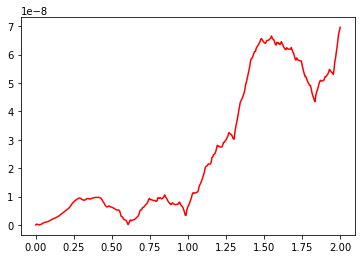

In [30]:
# constrained array, gives value of constrain fuction at different time steps
coarr = [(sym.sqrt(zfa).subs(subarr[i])-l3.subs(varr)) for i in range(n_steps)]

plt.plot(tout,np.abs(coarr),'r')
plt.show()

## Find Constrain Force:

<IPython.core.display.Math object>

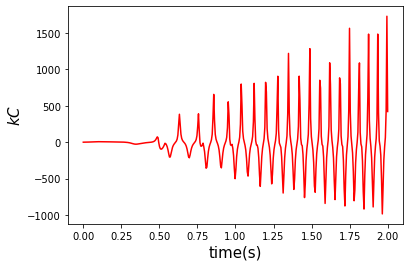

In [31]:
# constrained force
intf = ((kv*co).subs(varr)).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
intfarr = [(intf.subs(p,parr[i]).subs(subarr[i])) for i in range(n_steps)]

display(Math('intf = '+ vlatex(intf)))

plt.plot(tout,intfarr,'r')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$kC$', fontsize=15)
plt.show()

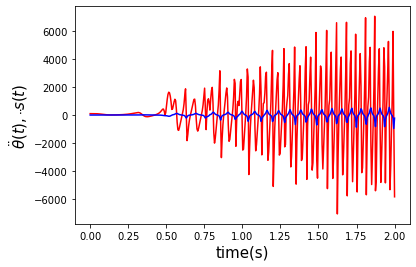

In [32]:
angaccarr = [((rhs[2].subs(varr)).subs(p,parr[i]).subs(subarr[i])) for i in range(n_steps)]
slideraccarr = [((rhs[3].subs(varr)).subs(p,parr[i]).subs(subarr[i])) for i in range(n_steps)]

plt.plot(tout,angaccarr,'r',tout,slideraccarr,'b')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$\ddot\theta(t),\ddot s(t)$', fontsize=15)
plt.show()

In [33]:
# zarr2 contains derivative of zarr
zarr2 = sym.Array([sym.Function('z5')(t),sym.Function('z6')(t),sym.Function('z7')(t),sym.Function('z8')(t)])
display(Math('zarr2 = '+ sym.latex(zarr2)))

<IPython.core.display.Math object>

In [34]:
rhsv = np.array([(rhs.subs(varr)).subs(p,parr[i]).subs(subarr[i]) for i in range(n_steps)])

# full sunbstitution array [zarr;zarr2]
fullarr = [[(zarr[j],sol[i,j]) for j in range(4)] + [(zarr2[j],rhsv[i,j]) for j in range(4)] for i in range(n_steps)]

In [35]:
fullarr

[[(z1(t), 1e-05),
  (z2(t), 0.18000000000000002),
  (z3(t), 0.0),
  (z4(t), 0.0),
  (z5(t), 0.0),
  (z6(t), 0.0),
  (z7(t), 98.9805008180131),
  (z8(t), -5.09042575619740e-5)],
 [(z1(t), 0.0012534648422642457),
  (z2(t), 0.17999995930955642),
  (z3(t), 0.4961417296302937),
  (z4(t), -3.1973397436424205e-05),
  (z5(t), 0.496141729630294),
  (z6(t), -3.19733974364242e-5),
  (z7(t), 98.9794023463078),
  (z8(t), -0.0190400632883556)],
 [(z1(t), 0.004983804244011873),
  (z2(t), 0.1799993611174463),
  (z3(t), 0.9922505635190255),
  (z4(t), -0.00025431210833971976),
  (z5(t), 0.992250563519026),
  (z6(t), -0.000254312108339720),
  (z7(t), 98.9629871201822),
  (z8(t), -0.0759985884505150)],
 [(z1(t), 0.011200522345592405),
  (z2(t), 0.1799967740208997),
  (z3(t), 1.4881614922215258),
  (z4(t), -0.0008571816546978723),
  (z5(t), 1.48816149222153),
  (z6(t), -0.000857181654697872),
  (z7(t), 98.8916144222439),
  (z8(t), -0.170845769186020)],
 [(z1(t), 0.01990168808023961),
  (z2(t), 0.1799898156

## Ground Reaction Force Calculation

<font size='3'>To determine the ground reaction forces we apply Newton-Eular Laws of motion on the whole chain. The equation of motions are
\begin{align*}
m_2\ddot{\vec r_{G2}}+ma\ddot{\vec r_{a}}+(m4+m_b)\ddot{\vec r_{a}} &= (Ox+f-pA)\hat i+(Oy+N)\hat j\\~\\
(I_{o2}+m_al_2^2)\ddot\theta-(I_{G3}-ma(l_3-a))\ddot\phi&=\tau+sN
\end{align*}</font>

In [36]:
rho2,Ox,Oy,N = sym.symbols('rho_2,O_x,O_y,N')
pG2 = rho2*sym.Array([sym.cos(theta),sym.sin(theta)])
pa = l2*sym.Array([sym.cos(theta),sym.sin(theta)])
ps = sym.Array([sd,ev])

display(Math('\\rho_{G2} = '+ vlatex(pG2)))
display(Math('\\rho_{a} = '+ vlatex(pa)))
display(Math('\\rho_s = '+ vlatex(ps)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [37]:
apG2 = sym.diff(pG2,[t,2])
apa = sym.diff(pa,[t,2])
aps = sym.diff(ps,[t,2])

display(Math('a_{G2} = '+ vlatex(apG2)))
display(Math('a_{a} = '+ vlatex(apa)))
display(Math('a_s = '+ vlatex(aps)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
teqn = (m2*apG2+ma*apa+(m4+mb)*aps-sym.Array([Ox-cd*b1[1]-p*A,Oy+N]))
display(Math('teqn = '+ vlatex(teqn)))

teqn = (m2*apG2+ma*apa+(m4+mb)*aps-sym.Array([Ox-cd*b1[1]-p*A,Oy+N])).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])
display(Math('teqn = '+ vlatex(teqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
ps3d = sym.Array(np.append(ps,sym.Array([0])))
pa3d = sym.Array(np.append(pa,sym.Array([0])))
d1ps3d = sym.diff(ps3d,t)
d1pa3d = sym.diff(pa3d,t)

phi = sym.asin(l2*sym.sin(theta)/l3)
d1phi = sym.diff(phi,t)

Ho = (m2*kr**2*b1[0]+np.cross(pa3d,ma*d1pa3d)[2]+np.cross(ps3d,(m4+mb)*d1ps3d)[2]-(m3*kr3**2-m3*a*(l3-a))*d1phi)
reqn = (sym.diff(Ho,t)-f1-sd*N+ev*cd*b1[1]).subs([(b1[0],zarr[2]),(b1[1],zarr[3]),(a1[0],zarr[0]),(a1[1],zarr[1])])


display(Math('\phi = '+ vlatex(phi)))
display(Math('\dot\phi = '+ vlatex(d1phi)))
display(Math('H_o = '+ vlatex(Ho)))
display(Math('reqn = '+ vlatex(reqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [40]:
teqnarr = sym.Array([sym.Eq(teqn[i],0) for i in range(len(teqn))])
reqn = sym.Eq(reqn,0)

display(Math('teqnarr : '+ vlatex(teqnarr)))
display(Math('reqn : '+ vlatex(reqn)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [41]:
# Solve for the normal reaction forces from the rotational equation of motion
normal = sym.solve(reqn,N)[0]

display(Math(vlatex(normal)))

<IPython.core.display.Math object>

In [42]:
normalarr = [normal.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])])]
display(Math(vlatex(normalarr)))

<IPython.core.display.Math object>

In [43]:
# Get the values of normal forces at different time instants.
normalarr = [normal.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(fullarr[i]) for i in range(n_steps)]
normalarr

[0.829550863698701,
 0.829526540749653,
 0.829163197590213,
 0.827584282898352,
 0.823322785668768,
 0.814335707236391,
 0.798058033793746,
 0.771522340148447,
 0.731569847291524,
 0.675167931937800,
 0.599823923833260,
 0.504046565434079,
 0.387764793477360,
 0.252588245194336,
 0.101806815485225,
 -0.0599131698424369,
 -0.227088679066744,
 -0.394106288468082,
 -0.555872084185818,
 -0.708289837368240,
 -0.848501687251471,
 -0.974901067380135,
 -1.08697881677637,
 -1.18508059325945,
 -1.27014380213990,
 -1.34346001263110,
 -1.40648525103335,
 -1.46070325604626,
 -1.50753638263904,
 -1.54829439347765,
 -1.58415079919511,
 -1.61613765405603,
 -1.64515175287534,
 -1.67196715394825,
 -1.69725062041603,
 -1.72157784007682,
 -1.74544916173087,
 -1.76930424483420,
 -1.79353530357359,
 -1.81849894921118,
 -1.84452669496240,
 -1.87193425864091,
 -1.90102979267611,
 -1.93212113034909,
 -1.96552205417055,
 -2.00155749463931,
 -2.04056731458106,
 -2.08290817495537,
 -2.12895232995102,
 -2.17908204

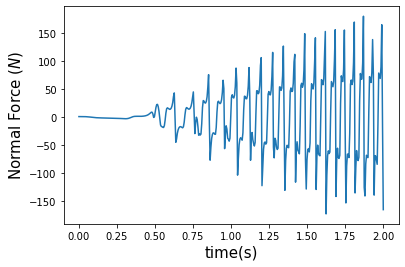

In [44]:
plt.plot(tout,normalarr)
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'Normal Force $(N)$', fontsize=15)
plt.show()

In [45]:
# Solve for Ox,Oy from the translational equations of motion
ground_force = sym.Array(sym.linsolve(teqnarr,[Ox,Oy]))[0]
display(Math(vlatex(ground_force)))

<IPython.core.display.Math object>

In [87]:
varr.append((rho2,0.025))
varr

[(m_2, 1.4),
 (m_3, 1.6),
 (m_4, 1),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (I_{f}, 0),
 (rho_2, 0.025)]

In [47]:
# Get the values of Ox,Oy at different time instants.
ground_force_arr = [ground_force.subs(varr).subs(p,parr[i]).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
ground_force_arr

[[-0.000157944599158517, 5.80214269077659],
 [-0.0592369615008109, 5.80206753398381],
 [-0.237078877232717, 5.8009458359207],
 [-0.53438901239045, 5.79607638559864],
 [-0.951156764983127, 5.78294720403742],
 [-1.48582820792241, 5.75528671467432],
 [-2.13418118446491, 5.70523461365019],
 [-2.88799425907597, 5.62371142758047],
 [-3.73369623071239, 5.50106468700902],
 [-4.65129541194573, 5.32803676148759],
 [-5.6139815647478, 5.0970232133932],
 [-6.58880093227086, 4.80347420024747],
 [-7.53865997540802, 4.44716533283176],
 [-8.42559126897786, 4.03298798119557],
 [-9.21478933007278, 3.5709479218396],
 [-9.87856571405788, 3.07524313555159],
 [-10.3992852654566, 2.56256347028421],
 [-10.7706047205084, 2.05000284457374],
 [-10.9968522837991, 1.55307764471468],
 [-11.0909198039673, 1.08426244469875],
 [-11.0713620132811, 0.652244601040218],
 [-10.9594298294775, 0.261870745454266],
 [-10.7765711703708, -0.0853975816800709],
 [-10.5426568635148, -0.390755135046241],
 [-10.274949304754, -0.657258

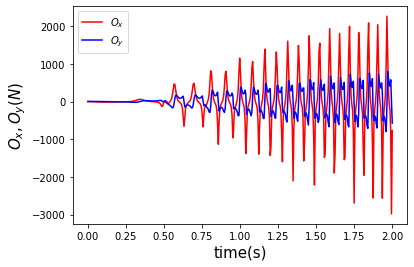

In [48]:
plt.plot(tout,np.array(ground_force_arr)[:,0],'r', label=r'$O_x$')
plt.plot(tout,np.array(ground_force_arr)[:,1],'b', label=r'$O_y$')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$O_x, O_y (N)$', fontsize=15)
plt.legend()
plt.show()

## Check for the Holding Forces on the Engine Support

<font size='3'>We have the net holding forces on the engine as</font>
\begin{align*}
F_x &= O_x-c_d\dot s-pA\\
F_y &= O_y+N\\
M_z &= sN
\end{align*}

In [49]:
Fx = ground_force[0]-cd*zarr[3]-p*A
Fy = ground_force[1]+normal
Mz = zarr[2]*normal-ev*cd*zarr[3]

display(Math('F_x = '+ vlatex(Fx)))
display(Math('F_y = '+ vlatex(Fy)))
display(Math('M_z = '+ vlatex(Mz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [50]:
support_force = sym.Array([Fx, Fy])

display(Math('Support\_force : '+ vlatex(support_force)))
display(Math('Support\_moment : '+ vlatex(Mz)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [51]:
# Get the values of Fx,Fy at different time instants.
support_forcearr = [support_force.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
support_forcearr

[[-0.000157944599158517, 6.63169355447529],
 [-0.0590770945136288, 6.63159407473346],
 [-0.235807316691018, 6.63010903351091],
 [-0.530103104116961, 6.623660668497],
 [-0.94100747424184, 6.60626998970619],
 [-1.4660336417455, 6.56962242191072],
 [-2.10005709502116, 6.50329264744393],
 [-2.83401154336516, 6.39523376772892],
 [-3.65357638807181, 6.23263453430055],
 [-4.53815379190911, 6.0032046934254],
 [-5.46052432506441, 5.69684713722646],
 [-6.38757434582436, 5.30752076568155],
 [-7.28234076357405, 4.83493012630912],
 [-8.10729583010826, 4.28557622638991],
 [-8.82837119507511, 3.67275473732482],
 [-9.41886806070878, 3.01532996570916],
 [-9.86231987949156, 2.33547479121747],
 [-10.1536406037034, 1.65589655610566],
 [-10.2984122318756, 0.997205560528857],
 [-10.3106972925438, 0.375972607330506],
 [-10.2100801037196, -0.196257086211253],
 [-10.0186671166541, -0.713030321925869],
 [-9.75857775986453, -1.17237639845644],
 [-9.45017808864067, -1.57583572830569],
 [-9.11106862715584, -1.9274

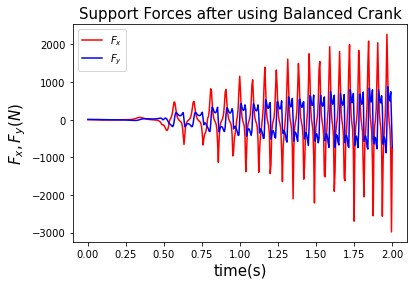

In [52]:
plt.plot(tout,np.array(support_forcearr)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(support_forcearr)[:,1],'b', label=r'$F_y$')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=15)
plt.title("Support Forces after using Balanced Crank", fontsize=15)
plt.legend()
plt.show()

### Balanced Crank

<font size='3'>For Balanced Crank we take $\rho_2=-\frac{m_3l_2(l_3-1)}{m_2l_3}$</font>

In [53]:
# new value of rho2
nrho2 = -m3*(l3-a)*l2/(m2*l3)

nsupport_force = support_force.subs(rho2,nrho2)
display(Math('support\_force : '+ vlatex(nsupport_force)))

<IPython.core.display.Math object>

In [54]:
nsupport_forcearr = [nsupport_force.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
nsupport_forcearr

[[-9.16276636115532e-5, 0],
 [-0.03427211391904, 0],
 [-0.136797459210927, 0],
 [-0.307522384534837, 0],
 [-0.545880653657055, 0],
 [-0.850401031049725, 0],
 [-1.21805207508488, 0],
 [-1.6434711098863, 0],
 [-2.11818835718559, 0],
 [-2.63002246253015, 0],
 [-3.16287734882262, 0],
 [-3.69717279347275, 0],
 [-4.21105393459791, 0],
 [-4.68233401253148, 0],
 [-5.09087437112679, 0],
 [-5.42089738077941, 0],
 [-5.6626802115808, 0],
 [-5.81323479741876, 0],
 [-5.87588704868252, -1.11022302462516e-16],
 [-5.85898289065658, 0],
 [-5.77413713264856, -1.11022302462516e-16],
 [-5.63445714532933, 0],
 [-5.45305601879021, 5.55111512312578e-17],
 [-5.24200492536078, 1.11022302462516e-16],
 [-5.01173192002422, -1.11022302462516e-16],
 [-4.77078874549414, 5.55111512312578e-17],
 [-4.52587463167943, -1.94289029309402e-16],
 [-4.28201227761637, 0],
 [-4.04279403788445, 0],
 [-3.81064311246527, 8.32667268468867e-17],
 [-3.58705729282689, -5.55111512312578e-17],
 [-3.37281951194787, 8.32667268468867e-17],


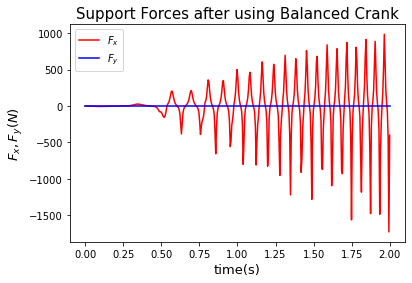

In [55]:
plt.plot(tout,np.array(nsupport_forcearr)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(nsupport_forcearr)[:,1],'b', label=r'$F_y$')

plt.title("Support Forces after using Balanced Crank", fontsize=15)
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=13)
plt.legend()
plt.show()

### Reciprocating Mass Balance

<font size='3'>For Reciprocating Mass Balance we take $a=-\frac{m_4}{m_3}l_3$</font>

In [56]:
na = -m4*l3/m3

nsupport_force2 = support_force.subs(a,na)
display(Math('support\_force : '+ vlatex(nsupport_force2)))

<IPython.core.display.Math object>

In [57]:
nsupport_forcearr2 = [nsupport_force2.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
nsupport_forcearr2

[[-0.000137582896134745, 9.10620607485563],
 [-0.0514610791439976, 9.10607261830707],
 [-0.205408510294518, 9.10408042596304],
 [-0.4617719406256, 9.09542925060298],
 [-0.819740717332613, 9.07209639677981],
 [-1.27720795353304, 9.02292594061504],
 [-1.82983131001706, 8.93393518139161],
 [-2.46992716796362, 8.78898163034758],
 [-3.18535725810724, 8.5709317823986],
 [-3.95866051915933, 8.26341285945576],
 [-4.76676014474043, 7.85308982195609],
 [-5.58157933995334, 7.33219812350731],
 [-6.37177416757735, 6.70083352825188],
 [-7.10551780064436, 5.96836248119609],
 [-7.75391132132563, 5.15338953333957],
 [-8.29429738074898, 4.28205191046934],
 [-8.712685281188, 3.38490777136497],
 [-9.00472249363531, 2.49313509929746],
 [-9.17508955916186, 1.63494213313056],
 [-9.23564629645259, 0.832935282770737],
 [-9.20292646237134, 0.102805009344984],
 [-9.09559979125593, -0.54672725379239],
 [-8.93235107476613, -1.11304049262722],
 [-8.73038909993887, -1.59825723589715],
 [-8.50459406404918, -2.0077762

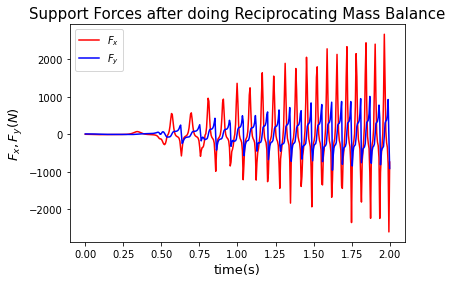

In [58]:
plt.plot(tout,np.array(nsupport_forcearr2)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(nsupport_forcearr2)[:,1],'b', label=r'$F_y$')

plt.title("Support Forces after doing Reciprocating Mass Balance", fontsize=15)
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=13)
plt.legend()
plt.show()

### Both Balanced Crank and Reciprocating Mass Balance

In [59]:
nsupport_force3 = support_force.subs([(rho2,nrho2),(a,na)])
display(Math('support\_force : '+ vlatex(nsupport_force3)))

<IPython.core.display.Math object>

In [60]:
nsupport_forcearr3 = [nsupport_force3.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
nsupport_forcearr3

[[0, -4.65208353816028],
 [0, -4.65201061136383],
 [0, -4.65092189729095],
 [0, -4.64619512135348],
 [0, -4.63344880574497],
 [0, -4.60658923319972],
 [0, -4.55797046032044],
 [0, -4.4787421564333],
 [0, -4.35945926637418],
 [0, -4.19099687765066],
 [0, -3.96574229855851],
 [0, -3.67892704708575],
 [0, -3.32984240543421],
 [0, -2.92260909295611],
 [0, -2.4662061157373],
 [0, -1.97363264525562],
 [0, -1.46033097459367],
 [0, -0.942232382772483],
 [0, -0.433887313339755],
 [0, 0.0529324108462544],
 [0, 0.509965232977284],
 [0, 0.932544608113518],
 [0, 1.31920308028988],
 [0, 1.67101390193107],
 [0, 1.99086342407365],
 [0, 2.282786869492],
 [0, 2.55143397301186],
 [0, 2.80168209889457],
 [0, 3.0383843949298],
 [0, 3.26622726698807],
 [0, 3.48966920352044],
 [0, 3.71293600898973],
 [0, 3.94005302284932],
 [0, 4.17490036897479],
 [0, 4.42128199036966],
 [0, 4.6830028817422],
 [0, 4.96395148051569],
 [0, 5.26818632311138],
 [0, 5.60002677554957],
 [0, 5.96414891873038],
 [0, 6.36568776940891

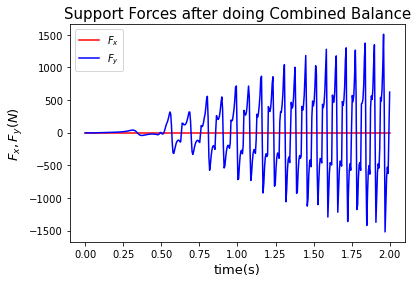

In [61]:
plt.plot(tout,np.array(nsupport_forcearr3)[:,0],'r', label=r'$F_x$')
plt.plot(tout,np.array(nsupport_forcearr3)[:,1],'b', label=r'$F_y$')

plt.title("Support Forces after doing Combined Balance", fontsize=15)
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$F_x, F_y (N)$', fontsize=13)
plt.legend()
plt.show()

 ## Balanace of Dynamic Moments

In [62]:
support_moment = [Mz.subs(varr).subs([(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
support_moment

[0,
 0.411562732701767,
 0.822737650058126,
 1.23157906137709,
 1.63301454714911,
 2.01732776257328,
 2.36885942160067,
 2.66521975645765,
 2.87743343596175,
 2.97148614664893,
 2.91161683340454,
 2.66531554208713,
 2.20936211172033,
 1.53556861442274,
 0.654524913907198,
 -0.404069316795927,
 -1.59493024050826,
 -2.86373393616470,
 -4.15487379290172,
 -5.41843327937550,
 -6.61494812815651,
 -7.71747313747316,
 -8.71129964606224,
 -9.59211929410070,
 -10.3634845036539,
 -11.0342304190474,
 -11.6162516047606,
 -12.1227956904763,
 -12.5672786708242,
 -12.9625449442989,
 -13.3204682196243,
 -13.6517923329218,
 -13.9661290844331,
 -14.2720510631923,
 -14.5772365129510,
 -14.8886385579675,
 -15.2126620157982,
 -15.5553397985216,
 -15.9225045079798,
 -16.3199557745632,
 -16.7536249631394,
 -17.2297404664180,
 -17.7549973943301,
 -18.3367356954977,
 -18.9831304773840,
 -19.7033979438927,
 -20.5080175808466,
 -21.4089699888710,
 -22.4199797436335,
 -23.5567509548270,
 -24.8371460014183,
 -26.2

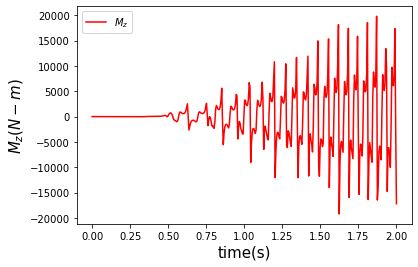

In [63]:
plt.plot(tout,support_moment,'r', label=r'$M_z$')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$M_z(N-m)$', fontsize=15)
plt.legend()
plt.show()

<font size='3'>For Dynamic Moment Balance we take  $k_{G3}^2=a(l_3-a)$</font>

In [64]:
# center of purcussion property of coupler
nkr3 = sym.sqrt(a*(l3-a))

nMz = Mz.subs(kr3,nkr3)
display(Math('Support\_moment = '+vlatex(nMz)))

<IPython.core.display.Math object>

In [65]:
nsupport_moment = [nMz.subs(varr).subs([(d1zarr[0],zarr[2]),(d1zarr[1],zarr[3]),(d1zarr[2],zarr2[2]),(d1zarr[3],zarr2[3])]).subs(N,normalarr[i]).subs(fullarr[i]) for i in range(n_steps)]
nsupport_moment

[0,
 -6.11803268701916e-6,
 -0.000195078393280923,
 -0.00148491330984513,
 -0.00627073317104099,
 -0.0191417507748262,
 -0.0474907562749878,
 -0.101868625643557,
 -0.195874188297283,
 -0.345346562209957,
 -0.566693296121739,
 -0.874384699676049,
 -1.27796275519996,
 -1.77925065272046,
 -2.37062354371419,
 -3.03504072178927,
 -3.74803028865012,
 -4.48115773395226,
 -5.20602737355136,
 -5.89778909496243,
 -6.53743860042822,
 -7.11269624094236,
 -7.61767707117895,
 -8.05178705899859,
 -8.41829582054487,
 -8.72292964780403,
 -8.97268116001867,
 -9.17490986267062,
 -9.33672642740868,
 -9.46461279231515,
 -9.56421816030789,
 -9.64027419912672,
 -9.69658339697786,
 -9.73604612043587,
 -9.76070215664506,
 -9.77177041860288,
 -9.76967587018961,
 -9.75405665728133,
 -9.72374566245591,
 -9.67672218166127,
 -9.61002886867502,
 -9.51964850520734,
 -9.40033387185264,
 -9.24538238287720,
 -9.04634530897610,
 -8.79265978420026,
 -8.47119018912060,
 -8.06566623584180,
 -7.55600745755458,
 -6.9175343875

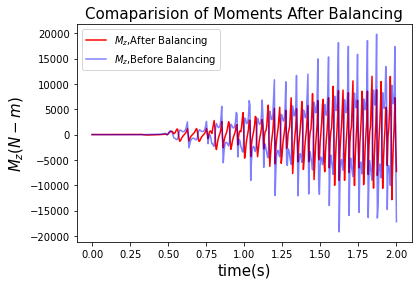

In [66]:
plt.plot(tout,nsupport_moment,'r', label=r'$M_z$,After Balancing')
plt.plot(tout,support_moment,'b', alpha=0.5, label=r'$M_z$,Before Balancing')
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$M_z(N-m)$', fontsize=15)
plt.title('Comaparision of Moments After Balancing', fontsize=15)
plt.legend()
plt.show()

## Performance with Flywheel

In [88]:
varr.pop(-2)
varr

[(m_2, 1.4),
 (m_3, 1.6),
 (m_4, 1),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (rho_2, 0.025)]

In [89]:
varr.append((If,0.001))
varr

[(m_2, 1.4),
 (m_3, 1.6),
 (m_4, 1),
 (l2, 0.04),
 (l3, 0.14),
 (a, 0.07),
 (k_r, 0.023),
 (k_{r3}, 0.04),
 (f_1, 0.2),
 (c_d, 5),
 (e_v, 0),
 (A, 0.05),
 (rho_2, 0.025),
 (I_{f}, 0.001)]

In [90]:
def dydt(zz,tval):
    if (zz[0]%(4*np.pi) >= (2*np.pi)) and (zz[0]%(4*np.pi) <= (2*np.pi)+1.55):
        temp = rhs.subs(varr).subs(p,2e3*sym.sin(2*(zz[0]%(4*np.pi))))
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])
    else:
        temp = rhs.subs(varr).subs(p,0)
        return temp.subs([(zarr[0],zz[0]),(zarr[1],zz[1]),(zarr[2],zz[2]),(zarr[3],zz[3]),(t,tval)])

In [91]:
n_steps = 400
tout = np.linspace(0,2,n_steps)
#yinit = [np.pi/2,(sym.sqrt(l3**2-(l2-ev)**2)).subs(varr),0,0]
yinit = [1e-5,(l2+l3).subs(varr),0,0]
yinit

[1e-05, 0.180000000000000, 0, 0]

In [92]:
solf = odeint(dydt,yinit,tout)
for i in range(n_steps):
    solf[i,0] = solf[i,0]%(4*np.pi)
solf

array([[ 1.00000000e-05,  1.80000000e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 8.41803759e-04,  1.79999981e-01,  3.31889545e-01,
        -1.43568365e-05],
       [ 3.33720384e-03,  1.79999713e-01,  6.63772484e-01,
        -1.13909758e-04],
       ...,
       [ 4.16134860e+00,  1.14847762e-01,  9.08699868e+01,
         2.61916579e+00],
       [ 4.58955093e+00,  1.29354320e-01,  8.09395497e+01,
         3.09588817e+00],
       [ 4.98338817e+00,  1.45300406e-01,  7.73244604e+01,
         3.21718735e+00]])

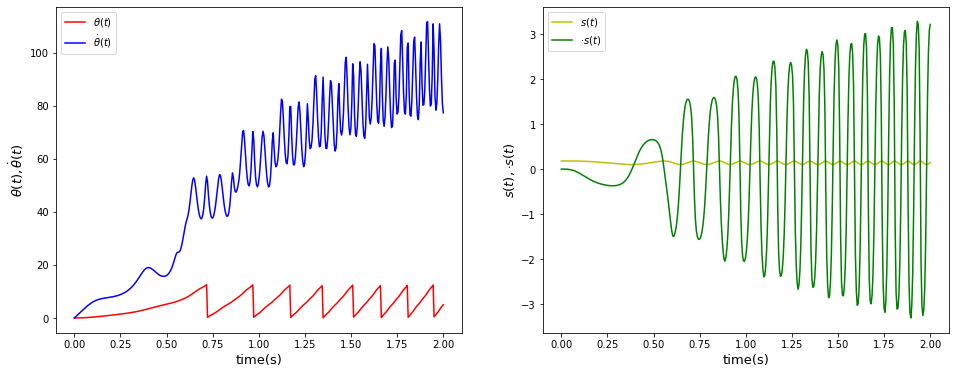

In [93]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(tout,solf[:,0],'r', label=r'$\theta(t)$')
plt.plot(tout,solf[:,2],'b', label=r'$\dot\theta(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$\theta(t), \dot\theta(t)$', fontsize=13)
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(tout,solf[:,1],'y', label=r'$s(t)$')
plt.plot(tout,solf[:,3],'g', label=r'$\dot s(t)$')
plt.xlabel('time(s)', fontsize=13)
plt.ylabel(r'$s(t), \dot s(t)$', fontsize=13)
plt.legend(loc='best')
plt.show()

In [94]:
# calculate pressure values for different crank angle i.e. at every time step
parrf = []
for i in range(n_steps):
    if solf[i,0]>=2*sym.pi and solf[i,0]<=2*sym.pi+1.64:
        parrf.append(5e3*sym.sin(2*solf[i,0]))
    else:
        parrf.append(0)
        
parrf

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1096.54000273622,
 2263.56211123883,
 3296.52656906593,
 4140.29382062523,
 4732.62819684835,
 4994.62510586558,
 4839.21631953694,
 4196.65091232823,
 3050.77775155293,
 1474.20846250894,
 -354.988597442671,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2443.36605433971,
 4264.75195019199,
 4989.38906094674,
 4585.53919133872,
 3145.42103137310,
 928.620318727176,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [95]:
# create a substitution array, get values of z1,z2,z3,z4 at different time instants
subarrf = [[(zarr[j],solf[i,j]) for j in range(4)] for i in range(n_steps)]
subarrf

[[(z1(t), 1e-05), (z2(t), 0.18000000000000002), (z3(t), 0.0), (z4(t), 0.0)],
 [(z1(t), 0.0008418037590392327),
  (z2(t), 0.1799999814998655),
  (z3(t), 0.3318895447695405),
  (z4(t), -1.43568364777702e-05)],
 [(z1(t), 0.0033372038412510163),
  (z2(t), 0.17999971329680436),
  (z3(t), 0.6637724840347573),
  (z4(t), -0.00011390975772014288)],
 [(z1(t), 0.007496101022009797),
  (z2(t), 0.17999855484210456),
  (z3(t), 0.9956157692378125),
  (z4(t), -0.0003838061274382968)],
 [(z1(t), 0.013318107269836049),
  (z2(t), 0.17999543893428185),
  (z3(t), 1.3273329459206538),
  (z4(t), -0.0009090761631942341)],
 [(z1(t), 0.020802212872259213),
  (z2(t), 0.17998887313908407),
  (z3(t), 1.6587570738835016),
  (z4(t), -0.0017743657935419199)],
 [(z1(t), 0.029946308998902504),
  (z2(t), 0.17997694265041786),
  (z3(t), 1.9896131494870566),
  (z4(t), -0.0030634429990571204)],
 [(z1(t), 0.04074658512749908),
  (z2(t), 0.1799573165537876),
  (z3(t), 2.319492233805699),
  (z4(t), -0.004858402747342595)],
 [

In [96]:
angaccarrf = [((rhs[2].subs(varr)).subs(p,parrf[i]).subs(subarrf[i])) for i in range(n_steps)]
slideraccarrf = [((rhs[3].subs(varr)).subs(p,parrf[i]).subs(subarrf[i])) for i in range(n_steps)]

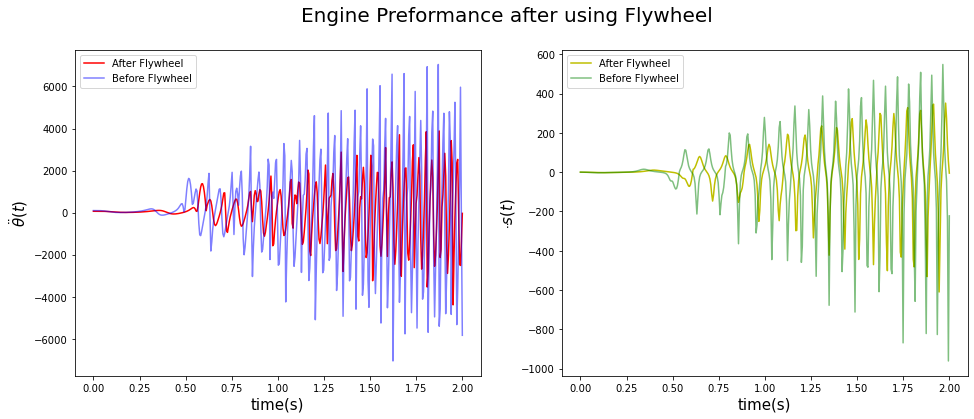

In [97]:
plt.figure(figsize=(16,6))
plt.suptitle("Engine Preformance after using Flywheel", fontsize=20)

plt.subplot(1,2,1)

plt.plot(tout,angaccarrf,'r', label="After Flywheel")
plt.plot(tout,angaccarr,'b', alpha=0.5, label="Before Flywheel")
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$\ddot\theta(t)$', fontsize=15)
plt.legend()


plt.subplot(1,2,2)

plt.plot(tout,slideraccarrf,'y', label="After Flywheel")
plt.plot(tout,slideraccarr,'g', alpha=0.5, label="Before Flywheel")
plt.xlabel('time(s)', fontsize=15)
plt.ylabel(r'$\ddot s(t)$', fontsize=15)
plt.legend()
plt.show()